# Kickstarter Campaign - Exploratory Data Analysis

Introduction
Kickstarter is a crowdfunding platform with a community of more than 10 million people comprising of creative, tech enthusiasts who help in bringing new projects to life.

Until now, more than $3 billion dollars have been contributed by the members in fueling creative projects. The projects can be literally anything – a device, a game, an app, a film etc.

Kickstarter works on all or nothing basis: a campaign is launched with a certain amount they want to raise, if it doesn’t meet its goal, the project owner gets nothing. For example: if a projects’s goal is $5000. Even if it gets funded till $4999, the project won’t be a success.

If you have a project that you would like to post on Kickstarter now, can you predict whether it will be successfully funded or not? Looking into the dataset, what useful information can you extract from it, which variables are informative for your prediction and can you interpret the model?

The goal of this project is to build a classifier to predict whether a project will be successfully funded or not. You can use the algorithm of your choice.


The purpose of this project is to submit a model to predict success of kickstarter campaign. This note book contains the data cleaning and exploratory sata analysis and the model building can be found the in the second notebook *Kickstarter Campaign - Model Build*

The data has been supplied by cambridge spark which looks to be a subset of kisckstarter data 
The dataset contains data on all projects hosted on Kickstarter between the company’s launch in April 2009 until the date of the webscrape on 14 March 2019. The dataset contains 209,222 projects. It also contains 1000 rows with an unknown evaluation state which is used to evaluate the final success of the mdel by Cambridge spark



## Contents

1. [Set Up](#setup)
2. [Initial Data Cleaning](#cleaning)
3. [Exploratory Data Analysis](#eda)

<a id='setup'></a>
### 1.Set Up  
Import the data and the libraries

In [330]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


sns.set_style('whitegrid')

In [236]:
df = pd.read_csv('data/kickstarter.csv')

#### Initial Data inspecion

In [237]:
df.sample(10)

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,static_usd_rate,creator,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set
19178,1582167839,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Adrift,Adrift is a tower defense/shoot 'em up where p...,40000.0,adrift-0,False,US,USD,$,True,1381675900,1378752809,1379083900,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False
53653,1219026825,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Art of Horology watch making project,The Art of Horology project started in 2008 in...,31000.0,art-of-horology-watch-making-project,False,US,USD,$,True,1456331280,1452443280,1452475561,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True
27196,381791653,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Animated Poetry Contest,One poem will be selected and transmogrified i...,2000.0,animated-poetry-contest-0,False,US,USD,$,True,1414363339,1409108123,1409179339,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False
51229,1576258872,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Blue Flame - Scifi/Horror Story,An independently published work of true horror...,350.0,blue-flame-scifi-horror-story,False,US,USD,$,True,1333152000,1328119183,1328544669,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True
39314,1070760553,"{""small"":""https://ksr-ugc.imgix.net/assets/014...",The Troubadour Farm,I am creating an Artists and Musicians Retreat...,7000.0,the-troubadour-farm,False,US,USD,$,True,1482183276,1479090214,1479591276,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False
32528,117742962,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Rise of the Magi Reprint Drive,Help us reprint the Christian fantasy/sci-fi ...,25000.0,rise-of-the-magi-reprint-drive,False,US,USD,$,True,1360016969,1354798709,1354832969,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False
14017,622777714,"{""small"":""https://ksr-ugc.imgix.net/assets/011...

In [238]:
print ('The full dataset contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))
print ('There are  {} evaluation rows where state is unknown and so the remaining {} rows will be used for the analysis'.format((df['evaluation_set'] == True).sum(), (df['evaluation_set'] == False).sum()))
print('{:.2f} % of kickstarter projects are sucessful'. format(100*(df.loc[df['evaluation_set'] == False, 'state'].mean())))

The full dataset contains 60000 rows and 27 columns
There are  10000 evaluation rows where state is unknown and so the remaining 50000 rows will be used for the analysis
49.76 % of kickstarter projects are sucessful


Restrict data set to exclude the evaluation set

In [239]:
ks = df[df['evaluation_set'] == False].drop('evaluation_set', axis=1).copy()

In [240]:
ks.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'slug', 'disable_communication', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'created_at', 'launched_at', 'static_usd_rate', 'creator', 'location', 'category', 'profile', 'urls', 'source_url', 'friends', 'is_starred', 'is_backing', 'permissions', 'state'], dtype='object')

In [241]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 26 columns):
id                        50000 non-null int64
photo                     50000 non-null object
name                      49998 non-null object
blurb                     49998 non-null object
goal                      50000 non-null float64
slug                      50000 non-null object
disable_communication     50000 non-null bool
country                   50000 non-null object
currency                  50000 non-null object
currency_symbol           50000 non-null object
currency_trailing_code    50000 non-null bool
deadline                  50000 non-null int64
created_at                50000 non-null int64
launched_at               50000 non-null int64
static_usd_rate           50000 non-null float64
creator                   50000 non-null object
location                  49770 non-null object
category                  50000 non-null object
profile                   50000 n

In [242]:
ks.describe(include = 'all').T.sort_values('mean')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,50000,NaN,NaN,NaN,0.49758,0.499999,0,0,0,1,1
static_usd_rate,50000,NaN,NaN,NaN,1.02577,0.18262,0.0463248,1,1,1,1.71641
goal,50000,NaN,NaN,NaN,39292.9,1.10879e+06,1,1800,5000,12000,1e+08
id,50000,NaN,NaN,NaN,1.07777e+09,6.18891e+08,24380,5.3889e+08,1.08529e+09,1.60952e+09,2.14744e+09
created_at,50000,NaN,NaN,NaN,1.39859e+09,5.54964e+07,1.24034e+09,1.35625e+09,1.40652e+09,1.44019e+09,1.49926e+09
launched_at,50000,NaN,NaN,NaN,1.40217e+09,5.55759e+07,1.24097e+09,1.36106e+09,1.41039e+09,1.44371e+09,1.49927e+09
deadline,50000,NaN,NaN,NaN,1.40508e+09,5.53853e+07,1.24356e+09,1.36391e+09,1.41331e+09,1.4465e+09,1.50016e+09
photo,50000,50000,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,49998,49929,The Journey,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blurb,49998,49873,The Decentralized Dance Party was founded on t...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
ks.nunique()

id                        50000
photo                     50000
name                      49929
blurb                     49873
goal                       2117
slug                      50000
disable_communication         1
country                      21
currency                     13
currency_symbol               5
currency_trailing_code        2
deadline                  48586
created_at                49991
launched_at               49985
static_usd_rate            4116
creator                   49923
location                   7396
category                    131
profile                   50000
urls                      50000
source_url                  131
friends                       1
is_starred                    1
is_backing                    1
permissions                   1
state                         2
dtype: int64

<a id='cleaning'></a>
### 2. Initial Data Cleaning 

#### Column Exploration
In this section we will look into the columns in more detail, dropping irrelevant ones and doing any data cleaning necessary

The below columns can be dropped as they contain many missings/ all same value/ not useful for this analysis

In [244]:
ks['disable_communication'].value_counts()

False    50000
Name: disable_communication, dtype: int64

In [245]:
cols_to_drop =['profile', 'photo', 'friends', 'is_starred', 'is_backing', 'permissions', 'disable_communication',
              'currency_symbol', 'currency_trailing_code', 'currency','urls', 'source_url', 'creator', 'slug']

ks.drop(cols_to_drop, axis=1, inplace = True)
ks.set_index('id', inplace = True)



- **id**                        Unique Kickstarter Identifier use for index
- **photo**                     url of photo - Drop as not useful for analysis
- **name**                      Name of Project - text field
- **blurb**                     More info about the project
- **goal**                      Amout in local currency
- **slug**                      Similar to name (drop?)
- **country**                   Country of Project
- **currency**                  Currency of Project
- **currency_symbol**           Currency Symbol - Drop as not useful for analysis
- **currency_trailing_code**    True/False field linked to currency symbol - Drop as not useful for analysis 
- **deadline**                  Datetime of campiagn dealine
- **created_at**                Datetime of campaign created
- **launched_at**               Datetime of campaign launched
- **static_usd_rate**           Rate to convert from local currency to USD
- **creator**                   Nearly unique url of creator - Drop as not useful for analysis 
- **location**                  Town/city of the project creator - Will drop I think due to small numbers
- **category**                  Category and subcategory (15 Categories altogether) of the project
- **profile**                   This is made up on info that is found in other columns - Drop as not useful for analysis 
- **urls**                      Url to project - Drop as not useful for analysis 
- **source_url**                Url to project - Drop as not useful for analysis 
- **friends**                   Nearly all Null - Drop
- **is_starred**                Nearly all Null - Drop
- **is_backing**                Nearly all Null - Drop
- **permissions**               Nearly all Null - Drop
- **state**                     1/0 flag determining success of project

#### Name / Blurb
NLP will not be used as part of this project, however we can do some basic analysis on name length 

In [246]:
# Count number of words in name and blurb 
ks['name_length'] = ks['name'].str.split().str.len().fillna(0)
ks['blurb_length'] = ks['blurb'].str.split().str.len().fillna(0)
# Drop name and blurb variable
ks.drop(['name', 'blurb'], axis=1, inplace=True)
ks[['name_length','blurb_length']].describe().T

,count,mean,std,min,25%,50%,75%,max
name_length,50000.0,5.63238,2.751106,0.0,3.0,5.0,8.0,21.0
blurb_length,50000.0,19.54464,4.839140,0.0,17.0,20.0,23.0,35.0


#### Goal
Convert to USD

In [247]:
ks['goal_usd'] = ks['goal'] * ks['static_usd_rate']
ks.drop(['goal', 'static_usd_rate'], axis=1, inplace = True)

#### Deadline / Created / Launched

Convert from unix to datetime column 

In [248]:
date_cols = ['created_at', 'deadline', 'launched_at']
for col in date_cols:
    ks[col] = pd.to_datetime(ks[col], origin='unix', unit='s')
    

print ('This dataset contains Kickstarter projects :')
print ('- created between {} and {}'.format(ks['created_at'].min().strftime('%d %B %Y'), ks['created_at'].max().strftime('%d %B %Y')))
print ('- launched between {} and {}'.format(ks['launched_at'].min().strftime('%d %B %Y'), ks['launched_at'].max().strftime('%d %B %Y')))
print ('- with a deadline between {} and {}'.format(ks['deadline'].min().strftime('%d %B %Y'), ks['deadline'].max().strftime('%d %B %Y')))


This dataset contains Kickstarter projects :
- created between 21 April 2009 and 05 July 2017
- launched between 29 April 2009 and 05 July 2017
- with a deadline between 29 May 2009 and 15 July 2017


Create date diff variables

In [249]:
ks['deadline_created_diff'] = (ks['deadline'] - ks['created_at']).dt.days
ks['launched_created_diff'] = (ks['launched_at'] - ks['created_at']).dt.days
ks['deadline_launched_diff'] = (ks['deadline'] - ks['launched_at']).dt.days

In [250]:
ks[['deadline_created_diff','launched_created_diff', 'deadline_launched_diff']].describe().T

,count,mean,std,min,25%,50%,75%,max
deadline_created_diff,50000.0,74.61762,105.920355,1.0,33.0,46.0,71.0,2349.0
launched_created_diff,50000.0,40.93660,105.111373,0.0,2.0,9.0,33.0,2313.0
deadline_launched_diff,50000.0,33.46210,12.629088,1.0,30.0,30.0,35.0,91.0


In [251]:
ks

,country,deadline,created_at,launched_at,location,category,state,name_length,blurb_length,goal_usd,deadline_created_diff,launched_created_diff,deadline_launched_diff
id,,,,,,,,,,,,,
805910621,US,2015-11-10 13:41:00,2015-10-10 23:05:29,2015-10-12 18:16:55,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",0.0,8.0,24.0,125000.00000,30,1,28
1279627995,US,2012-10-31 18:49:04,2012-09-20 15:47:18,2012-10-01 18:49:04,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",0.0,6.0,19.0,9800.00000,41,11,30
1306016155,US,2016-09-29 18:33:51,2016-09-07 17:59:47,2016-09-08 18:33:51,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.0,7.0,11.0,2500.00000,22,1,21
658851276,GB,2014-05-24 23:00:00,2014-03-27 16:20:56,2014-04-11 12:19:50,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.0,2.0,22.0,16800.79300,58,14,43
1971770539,US,2015-03-10 05:00:00,2015-01-31 22:20:20,2015-02-07 15:04:53,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",0.0,5.0,23.0,5500.00000,37,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
780486809,US,2014-09-09 22:31:35,2014-04-21 00:05:00,2014-08-10 22:31:35,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.0,5.0,17.0,3000.00000,141,111,30
529920300,US,2016-03-17 06:41:39,2015-07-06 23:18:00,2016-02-16 07:41:39,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.0,9.0,8.0,2000.00000,254,224,29
1275479762,US,2012-03-13 19:21:21,2012-01-08 19:57:10,2012-01-13 20:21:21,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",1.0,11.0,25.0,4000.00000,64,5,59


#### Category

In [252]:
def extract_json(field, subfield):
    loc_json = json.loads(field)
    return loc_json[subfield]

# apply function to dataframe
ks['cat'] = ks['category'].apply(extract_json, args=('slug', )).str.split('/').str[0]
ks['subcat'] = ks['category'].apply(extract_json, args=('slug', )).str.split('/').str[1]
ks['position'] = ks['category'].apply(extract_json, args=('position', ))
ks.drop(['category', 'location'], axis=1, inplace = True)

ks

,country,deadline,created_at,launched_at,state,name_length,blurb_length,goal_usd,deadline_created_diff,launched_created_diff,deadline_launched_diff,cat,subcat,position
id,,,,,,,,,,,,,,
805910621,US,2015-11-10 13:41:00,2015-10-10 23:05:29,2015-10-12 18:16:55,0.0,8.0,24.0,125000.00000,30,1,28,film & video,movie theaters,11
1279627995,US,2012-10-31 18:49:04,2012-09-20 15:47:18,2012-10-01 18:49:04,0.0,6.0,19.0,9800.00000,41,11,30,publishing,nonfiction,9
1306016155,US,2016-09-29 18:33:51,2016-09-07 17:59:47,2016-09-08 18:33:51,1.0,7.0,11.0,2500.00000,22,1,21,music,country & folk,5
658851276,GB,2014-05-24 23:00:00,2014-03-27 16:20:56,2014-04-11 12:19:50,1.0,2.0,22.0,16800.79300,58,14,43,film & video,documentary,4
1971770539,US,2015-03-10 05:00:00,2015-01-31 22:20:20,2015-02-07 15:04:53,0.0,5.0,23.0,5500.00000,37,6,30,film & video,narrative film,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780486809,US,2014-09-09 22:31:35,2014-04-21 00:05:00,2014-08-10 22:31:35,1.0,5.0,17.0,3000.00000,141,111,30,music,hip-hop,8
529920300,US,2016-03-17 06:41:39,2015-07-06 23:18:00,2016-02-16 07:41:39,1.0,9.0,8.0,2000.00000,254,224,29,publishing,children's books,5
1275479762,US,2012-03-13 19:21:21,2012-01-08 19:57:10,2012-01-13 20:21:21,1.0,11.0,25.0,4000.00000,64,5,59,music,rock,17


Check Missings now - No missings great

In [253]:
ks.isnull().sum()


country                   0
deadline                  0
created_at                0
launched_at               0
state                     0
name_length               0
blurb_length              0
goal_usd                  0
deadline_created_diff     0
launched_created_diff     0
deadline_launched_diff    0
cat                       0
subcat                    0
position                  0
dtype: int64

<a id='eda'></a>
### 3. Exploratory Data Analysis

#### Numerical Columns

In [495]:
#Extract the numeric columns but exclude state as that is the predictor
numeric_cols = ks.select_dtypes(include=['int64', 'float64']).columns
# numeric_cols = numeric_cols[numeric_cols != 'state']
numeric_cols

Index(['state', 'name_length', 'blurb_length', 'goal_usd', 'deadline_created_diff', 'launched_created_diff', 'deadline_launched_diff', 'position', 'log_goal_usd', 'log_deadline_launched_diff', 'log_days'], dtype='object')

Quickly plot out the numeric columns in a pairplot

Text(0.5, 1, 'Numeric Column Pairplot')

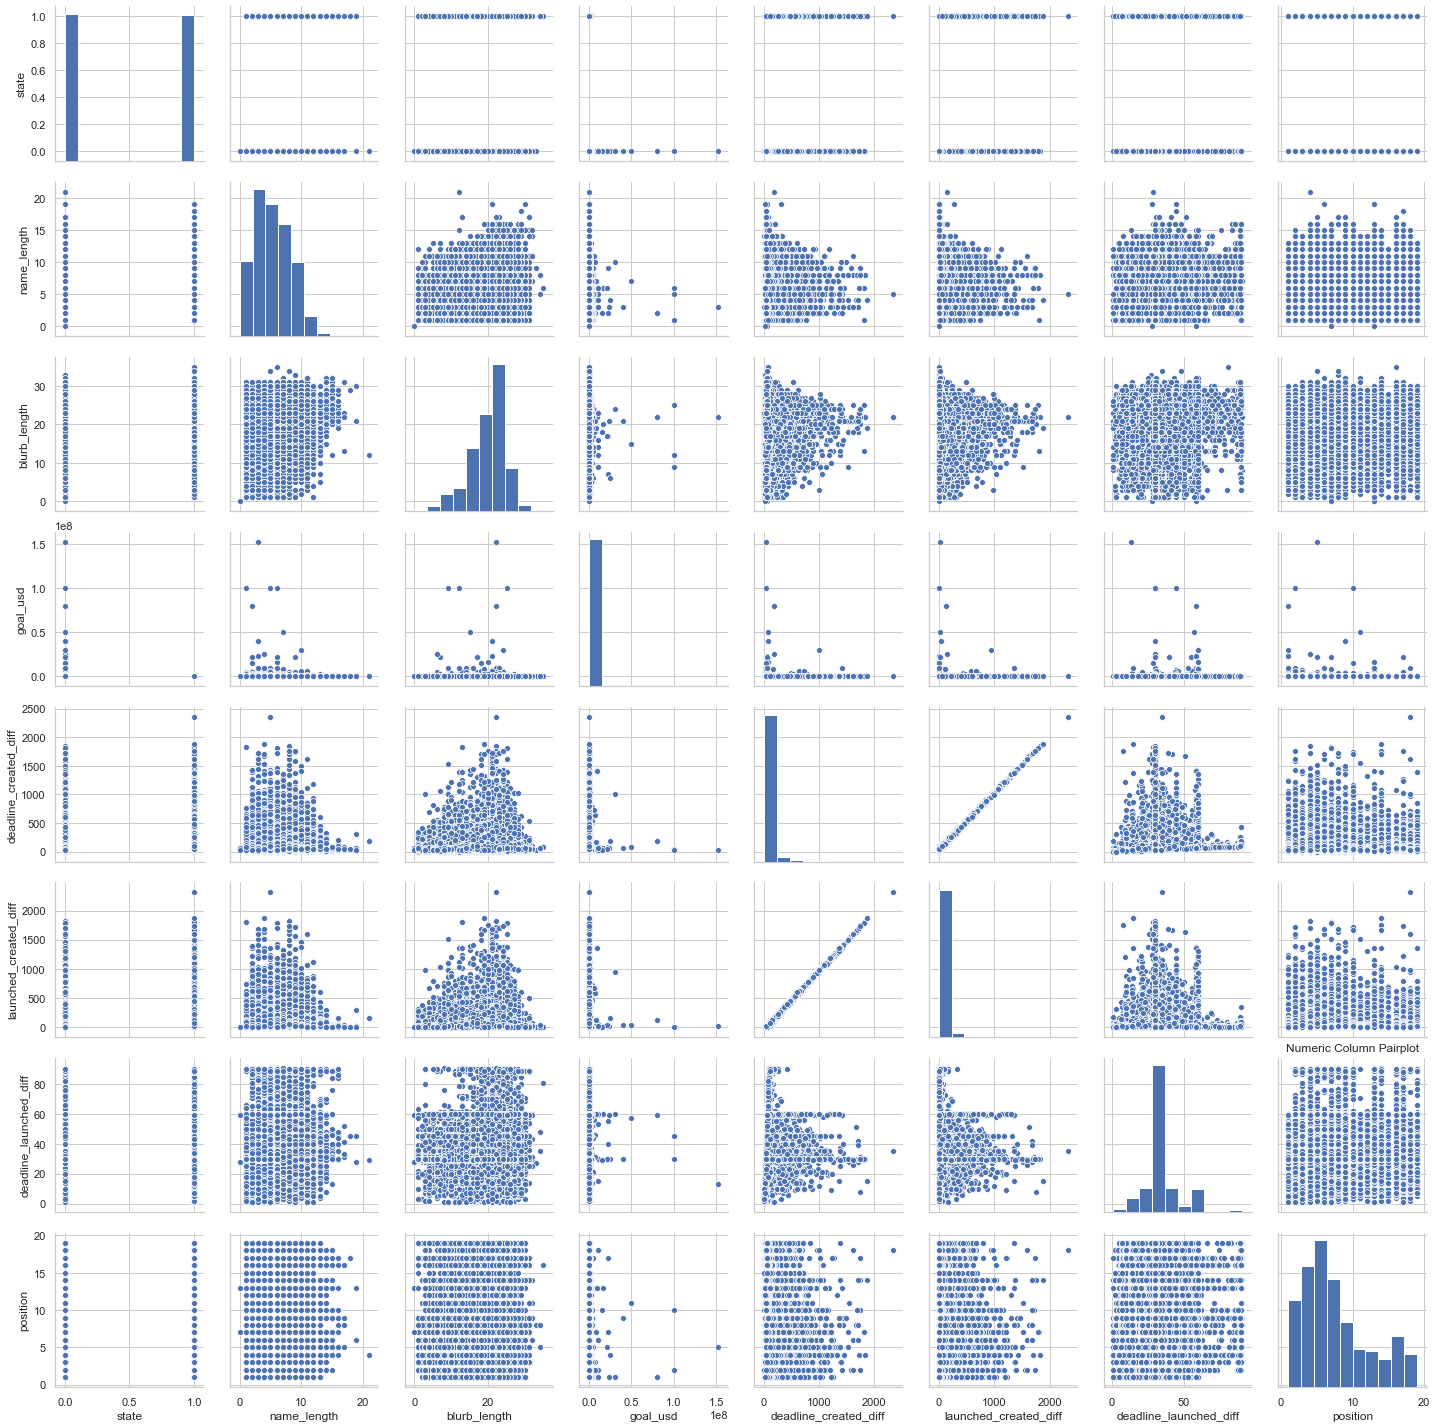

In [368]:
sns.pairplot(ks[numeric_cols])
plt.title('Numeric Column Pairplot')

#### Correlations

Deadline Created and launched created are highly correlated due to the fact launched created is a component of deadline created. But Deadline launched and created launched is not so can include both.


Text(0.5, 1, 'Kickstarter Correlation Matrix')

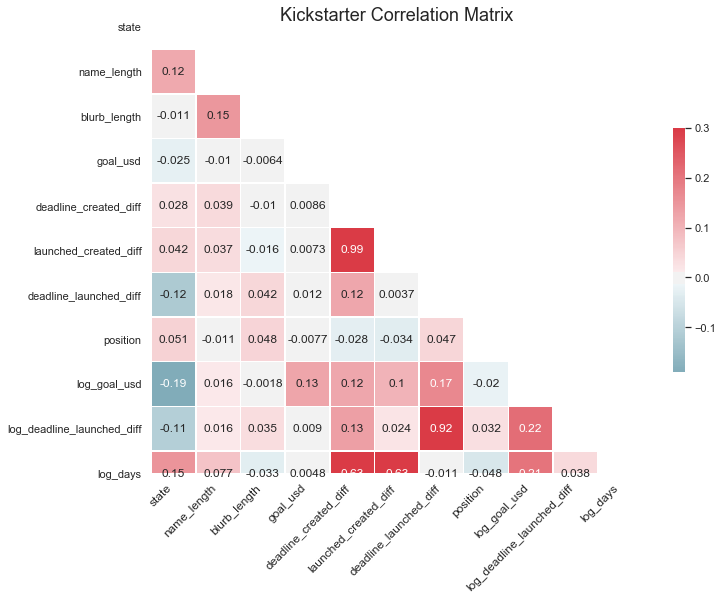

In [561]:
corr = ks[numeric_cols].corr()
corr

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
sns.set(style="white")
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium')
ax.set_title('Kickstarter Correlation Matrix', fontsize =18)

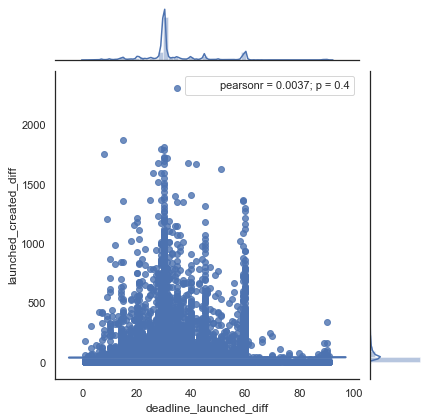

In [562]:
reg_plot = sns.jointplot(x='deadline_launched_diff',y='launched_created_diff',data=ks,kind = 'reg')
reg_plot.annotate(stats.pearsonr)

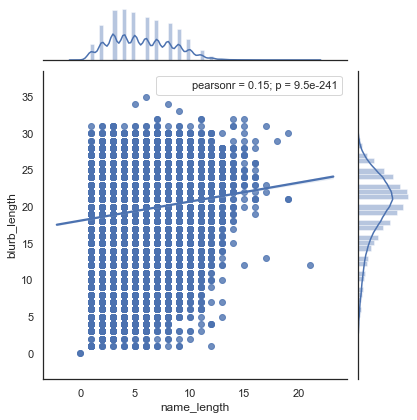

In [563]:
reg_plot = sns.jointplot(x='name_length',y='blurb_length',data=ks,kind = 'reg')
reg_plot.annotate(stats.pearsonr)

#### Look at the distribution of the numerical varaibles

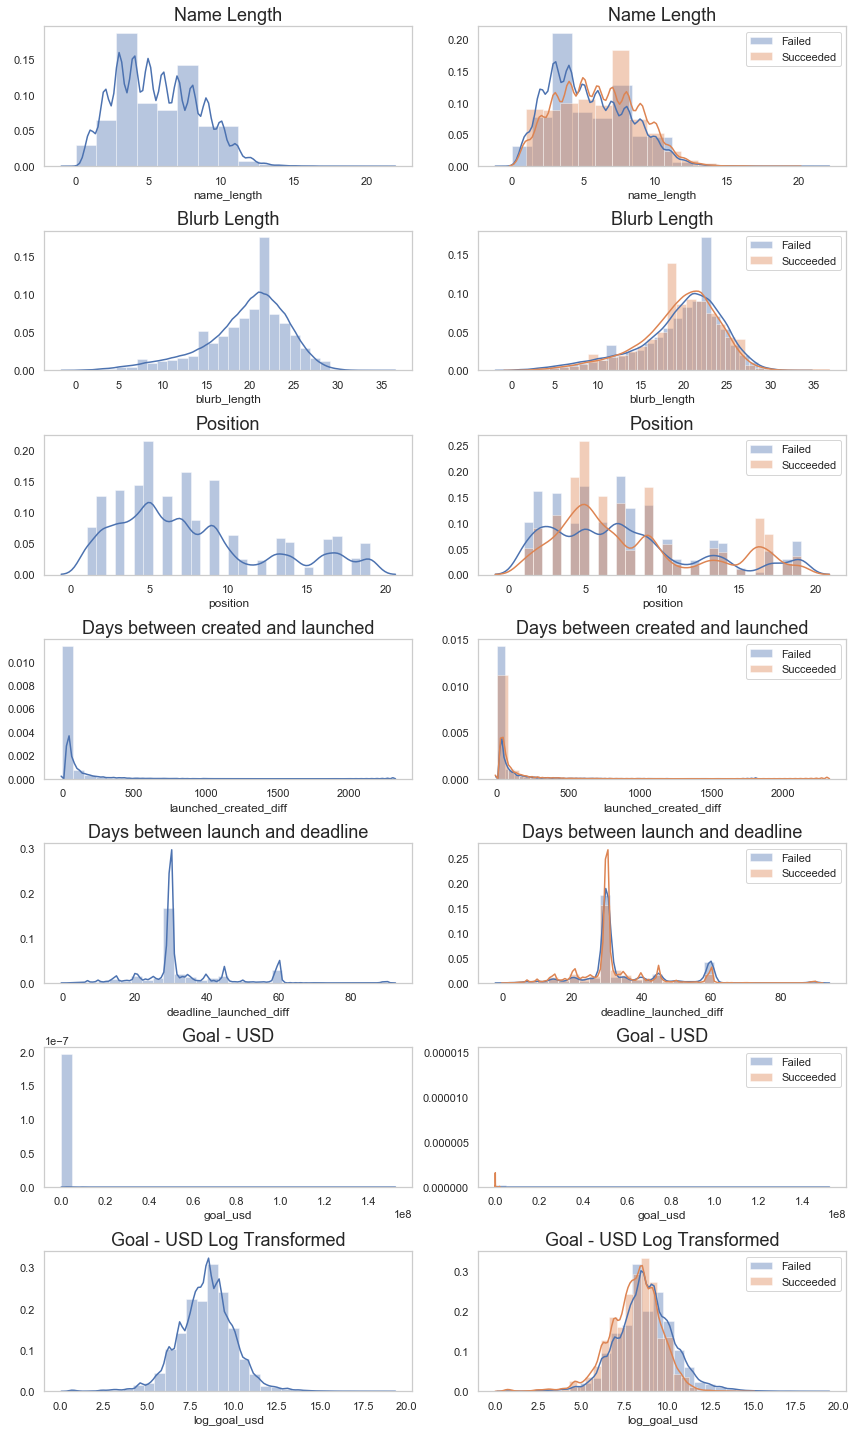

In [506]:

fig, axs = plt.subplots(7, 2, figsize=(12,20))

def plot_numeric_dist(dataframe, row, axs, col_name, title, bins=30):
    
    chart1 = sns.distplot(ks.loc[:, col_name], bins = bins, ax=axs[row,0])
    chart1.set_title(title, fontsize = 18)
    chart1.grid(False)
    
    chart2 = sns.distplot(dataframe.loc[ks['state'] == 0, col_name], label = 'Failed', bins = bins, ax=axs[row,1] )
    chart2 = sns.distplot(dataframe.loc[ks['state'] == 1, col_name], label = 'Succeeded', bins = bins, ax=axs[row,1])
    chart2.set_title(title, fontsize = 18)
    chart2.legend()
    chart2.grid(False)
    plt.tight_layout()
    
    

plot_numeric_dist(ks, 0, axs, 'name_length', 'Name Length',15)  
plot_numeric_dist(ks, 1, axs, 'blurb_length', 'Blurb Length') 
plot_numeric_dist(ks, 2, axs, 'position', 'Position') 
plot_numeric_dist(ks, 3, axs, 'launched_created_diff', 'Days between created and launched')
plot_numeric_dist(ks, 4, axs, 'deadline_launched_diff', 'Days between launch and deadline')
plot_numeric_dist(ks, 5, axs, 'goal_usd', 'Goal - USD')

# Add log of USD
ks['log_goal_usd']= np.log(ks['goal_usd'] +1 )
plot_numeric_dist(ks, 6, axs, 'log_goal_usd', 'Goal - USD Log Transformed')


#### Compare median of the numerical variables for successes vs Failures

The average success rate is 49.8 %
The Median project goal is $5,000
successful projects have a median goal of $3,842 vs $5,850 for unsuccessful projects


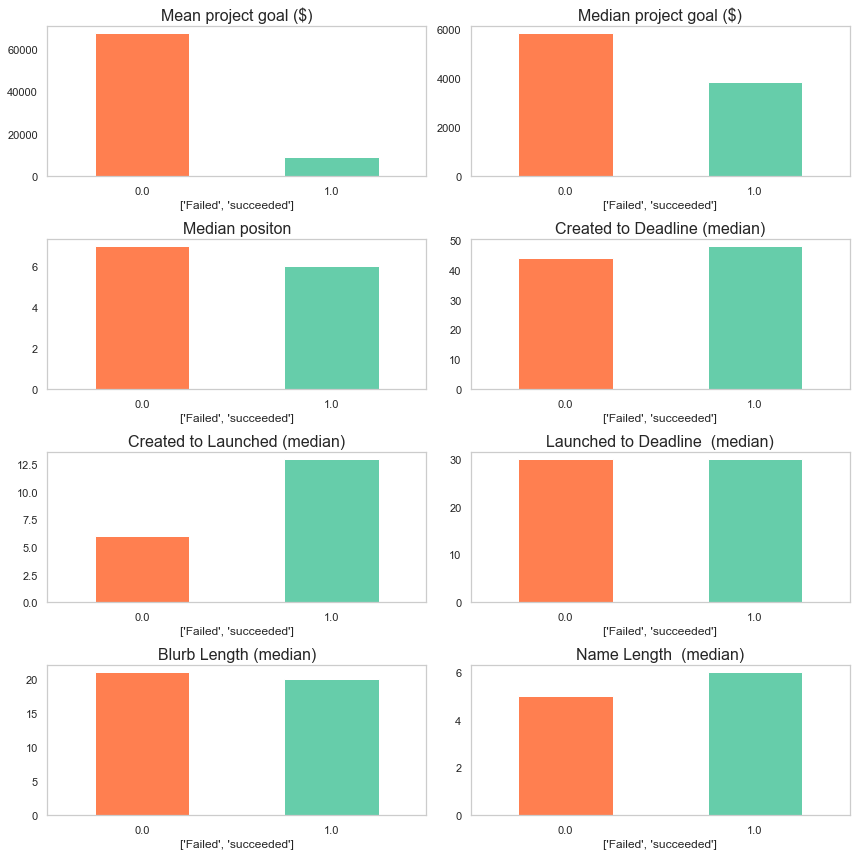

In [558]:
fig, ax = plt.subplots(4, 2, figsize=(12,12))


def plot_by_state(ax, title, data):
    data.plot(kind='bar', color=['coral', 'mediumaquamarine'],ax=ax, rot=0)
    ax.set_title(title, fontsize =16)
    ax.set_xlabel(['Failed', 'succeeded'])
    ax.grid(False)
    plt.tight_layout()


plot_by_state(ax[0,0], 'Mean project goal ($)', ks.groupby('state')['goal_usd'].mean())
plot_by_state(ax[0,1], 'Median project goal ($)', ks.groupby('state')['goal_usd'].median())
plot_by_state(ax[1,0], 'Median positon', ks.groupby('state')['position'].median())
plot_by_state(ax[1,1], 'Created to Deadline (median)', ks.groupby('state')['deadline_created_diff'].median())
plot_by_state(ax[2,0], 'Created to Launched (median)', ks.groupby('state')['launched_created_diff'].median())
plot_by_state(ax[2,1], 'Launched to Deadline  (median)', ks.groupby('state')['deadline_launched_diff'].median())
plot_by_state(ax[3,0], 'Blurb Length (median)', ks.groupby('state')['blurb_length'].median())
plot_by_state(ax[3,1], 'Name Length  (median)', ks.groupby('state')['name_length'].median())

success_df = ks[ks['state'] == 1]
fail_df = ks[ks['state'] == 0]

print('The average success rate is {:,.1f} %'.format(100 * ks['state'].mean())) 
print('The Median project goal is ${:,.0f}'.format(ks['goal_usd'].median()))
print('successful projects have a median goal of ${:,.0f} vs ${:,.0f} for unsuccessful projects'.format(success_df['goal_usd'].median(), fail_df['goal_usd'].median()))    


Explore Created to launched as there appear to be some outliers

In [507]:
ks['launched_created_diff'].describe()

count    50000.000000
mean        40.936600
std        105.111373
min          0.000000
25%          2.000000
50%          9.000000
75%         33.000000
max       2313.000000
Name: launched_created_diff, dtype: float64

In [508]:
ks['launched_created_diff' ].skew()  #6.7
np.log(ks['launched_created_diff' ] +1 ).skew()  #0.28
np.sqrt(ks['launched_created_diff' ]  ).skew()  #2.43

2.430268607272595

Created to Launched Days exploration

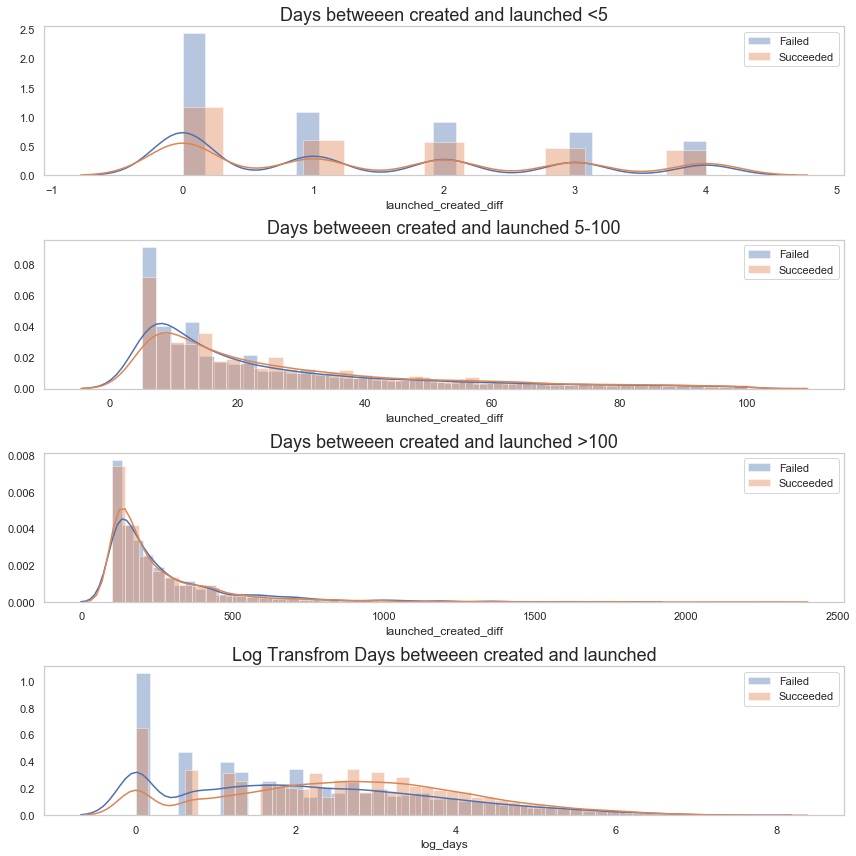

In [487]:
fig, ax = plt.subplots(4, 1, figsize=(12,12))
low_days = ks.loc[ks['launched_created_diff'] <5, :]
low_days.loc[low_days['state'] == 0,'launched_created_diff' ]
chart1 = sns.distplot(low_days.loc[low_days['state'] == 0,'launched_created_diff' ], label = 'Failed', ax=ax[0] )
chart1 = sns.distplot(low_days.loc[low_days['state'] == 1,'launched_created_diff' ], label = 'Succeeded',ax=ax[0])
chart1.set_title('Days betweeen created and launched <5', fontsize = 18)
chart1.legend()
chart1.grid(False)

mid_days = ks.loc[(ks['launched_created_diff'] >=5)  & (ks['launched_created_diff'] <=100)]
mid_days.loc[mid_days['state'] == 0,'launched_created_diff' ]
chart1 = sns.distplot(mid_days.loc[mid_days['state'] == 0,'launched_created_diff' ], label = 'Failed', ax=ax[1] )
chart1 = sns.distplot(mid_days.loc[mid_days['state'] == 1,'launched_created_diff' ], label = 'Succeeded',ax=ax[1])
chart1.set_title('Days betweeen created and launched 5-100', fontsize = 18)
chart1.legend()
chart1.grid(False)
plt.tight_layout()

high_days = ks.loc[ks['launched_created_diff'] >100, :]
high_days.loc[high_days['state'] == 0,'launched_created_diff' ]
chart1 = sns.distplot(high_days.loc[high_days['state'] == 0,'launched_created_diff' ], label = 'Failed', ax=ax[2] )
chart1 = sns.distplot(high_days.loc[high_days['state'] == 1,'launched_created_diff' ], label = 'Succeeded',ax=ax[2])
chart1.set_title('Days betweeen created and launched >100', fontsize = 18)
chart1.legend()
chart1.grid(False)
plt.tight_layout()


ks['log_days'] = np.log(ks['launched_created_diff' ]+1)
chart1 = sns.distplot(ks.loc[ks['state'] == 0, 'log_days'], label = 'Failed', ax=ax[3] )
chart1 = sns.distplot(ks.loc[ks['state'] == 1, 'log_days'], label = 'Succeeded', ax=ax[3])
chart1.set_title('Log Transfrom Days betweeen created and launched', fontsize = 18)
chart1.legend()
chart1.grid(False)
plt.tight_layout()


####  Categorical varaibles

In [385]:
cat_cols = ks.select_dtypes(include=['object']).columns
cat_cols

Index(['country', 'cat', 'subcat'], dtype='object')

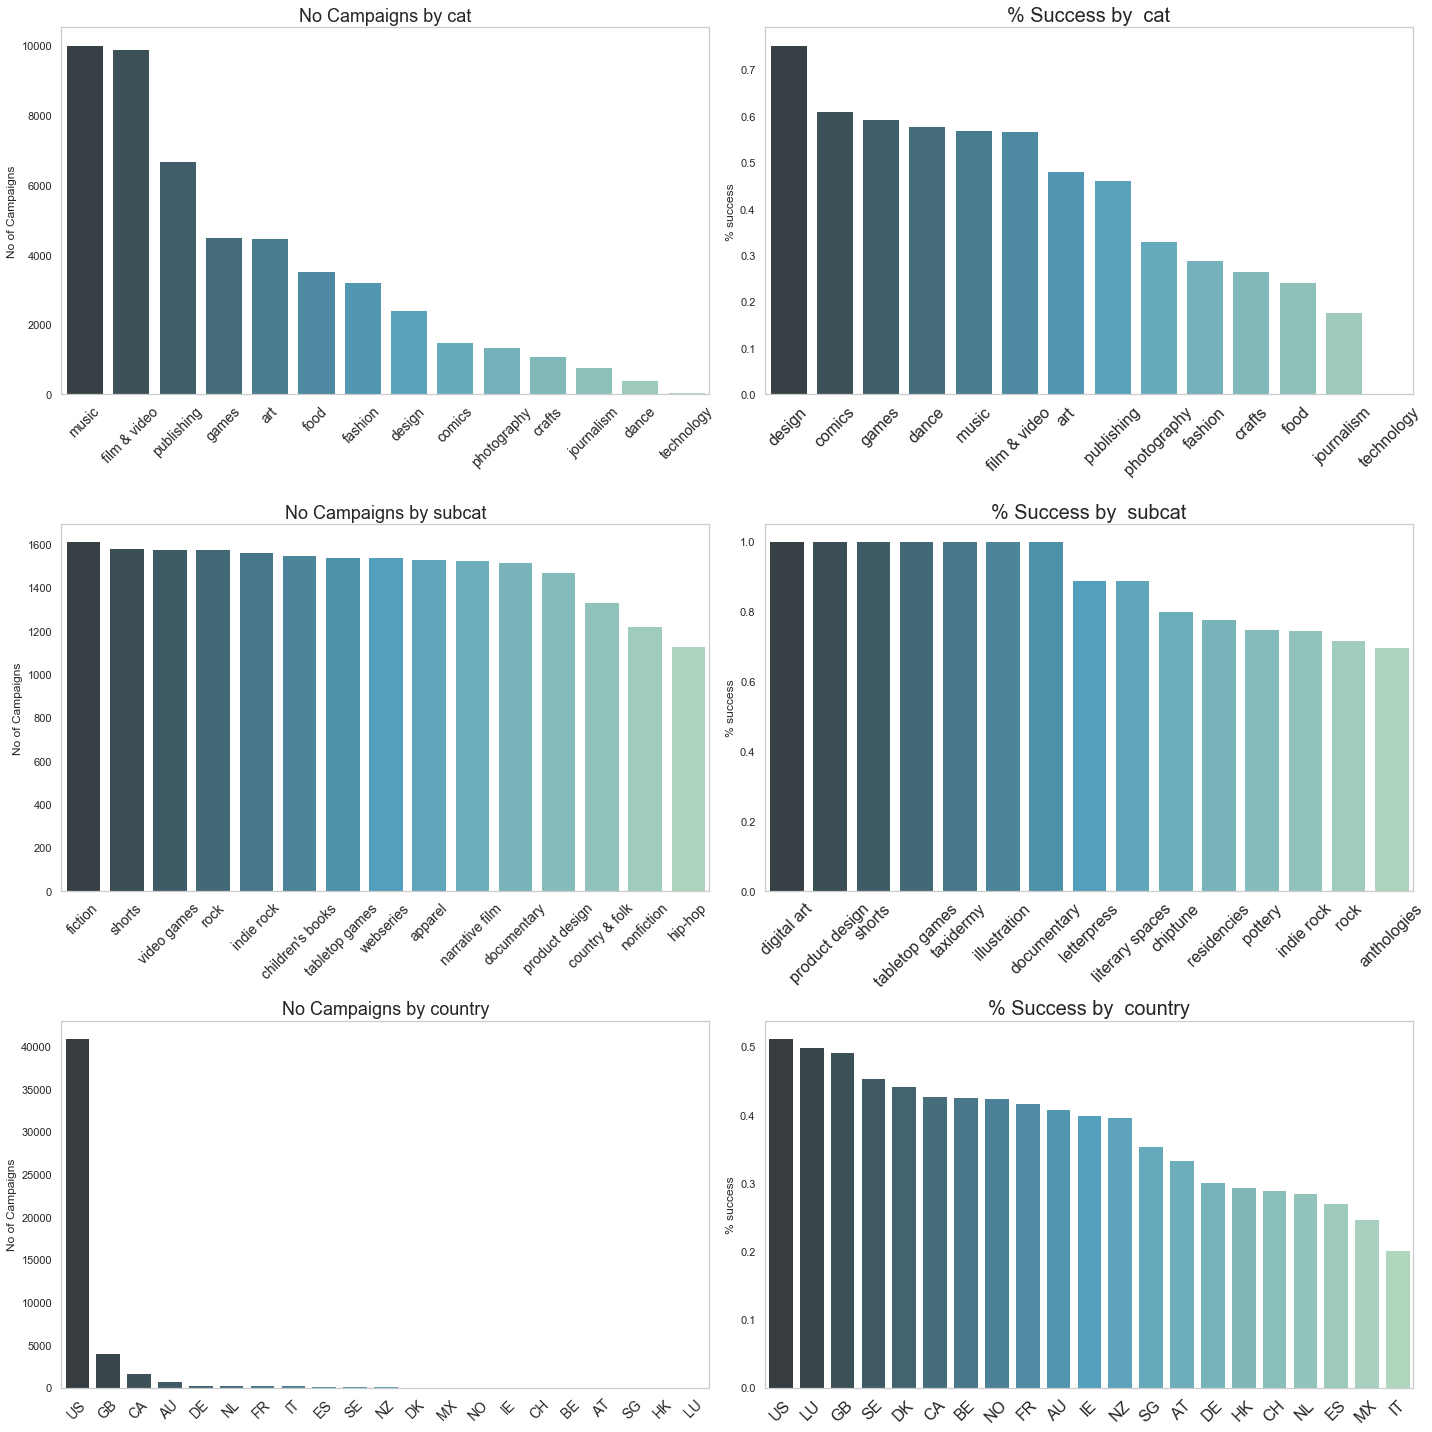

In [494]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))

def plot_val_counts(col,axs,i, num_cols):
    
    categories = pd.DataFrame(ks[col].value_counts().head(num_cols)).reset_index()
    cat_success =  pd.DataFrame(ks.groupby(col)['state'].mean().sort_values(ascending = False).head(num_cols)).reset_index()
    # categories

    chart1=sns.barplot(x="index", y=col , data=categories, palette="GnBu_d",ax = axs[i,0] )
    chart1.grid(False)
    chart1.set(xlabel='', ylabel='No of Campaigns')
    chart1.set_title('No Campaigns by ' + col, fontsize =18 )
    chart1.set_xticklabels(chart1.get_xticklabels(),rotation=45, fontsize =14)
    chart2=sns.barplot(x=col, y='state' , data=cat_success, palette="GnBu_d",ax = axs[i,1])
    
    chart2.grid(False)
    chart2.set(xlabel='', ylabel='% success')
    chart2.set_title('% Success by  ' + col, fontsize =20 )
    chart2.set_xticklabels(chart2.get_xticklabels(),rotation=45, fontsize =16)
    plt.tight_layout()
    
                 
plot_val_counts('cat', axs,0, 25)
plot_val_counts('subcat', axs,1, 15)
plot_val_counts('country', axs,2,25 )


In [540]:
#Success of categories
100*ks.groupby('cat')['state'].mean().sort_values(ascending = False)
100*ks.groupby('subcat')['state'].mean().sort_values(ascending = False)
100*ks.groupby('country')['state'].mean().sort_values(ascending = False)

country
US    51.244813
LU    50.000000
GB    49.146251
SE    45.454545
DK    44.166667
CA    42.703620
BE    42.647059
NO    42.528736
FR    41.758242
AU    40.816327
IE    40.000000
NZ    39.664804
SG    35.483871
AT    33.333333
DE    30.110497
HK    29.411765
CH    28.985507
NL    28.472222
ES    27.053140
MX    24.761905
IT    20.155039
Name: state, dtype: float64

In [542]:
#Distribution of categories
100*ks.groupby('cat').count()['country']/ks.count()['country']
100*ks.groupby('subcat').count()['country']/ks.count()['country']
100*ks.groupby('country').count()['subcat']/ks.count()['subcat']

country
AT     0.090
AU     1.666
BE     0.136
CA     3.536
CH     0.138
DE     0.724
DK     0.240
ES     0.414
FR     0.546
GB     8.082
HK     0.034
IE     0.150
IT     0.516
LU     0.012
MX     0.210
NL     0.576
NO     0.174
NZ     0.358
SE     0.396
SG     0.062
US    81.940
Name: subcat, dtype: float64

In [537]:
#Average Goal of categories
ks.groupby('cat')['goal_usd'].median().sort_values(ascending = False)

cat
technology      16899.35190
food            12000.00000
games            7500.00000
design           7500.00000
film & video     6000.00000
fashion          6000.00000
journalism       5000.00000
publishing       4000.00000
photography      4000.00000
music            3500.00000
comics           3500.00000
dance            3307.33765
art              3000.00000
crafts           2000.00000
Name: goal_usd, dtype: float64

#### Category Analysis
Over 50% of projects are in the top three categories (of a total of 15 categories) of **music**, **film** and **publishing**. **Music** is the post popular category (accounting for 20% of projects), it has a success rate of 57%

**Design** is the top performing category with a success rate of 75%. This category accounts for 5% of all projects


**Technology** is the least succesful category with all failures (Technology does however make up a small proportion of overall projects just 0.16%) **Journalism and food** are also in the bottom 3 of successes ( 17.8% and 24.1% success rate respectively)

#### Subcategory Analysis
There are some sub categories that perform exceptionally well with **digital art, product design, shorts, tabletop games, taxidermy ,illustration and documentary** acieving 100* success rate. Though we must be cateful with small volumes.
there are some subcats that are performing well and have reasonable volumes which we can use to further sub divide the category feature which may help with model prediction

#### Country Analysis
The US accounts for 81% of all projects with a success rate of 51% (Top performing country)

#### Split out the categories further with some subcats

In [560]:
# Function to split out categories
def new_cat (row):
    if row['subcat'] == 'rock':
        return 'music-rock'
    elif row['subcat'] == 'indie rock':
        return 'music-rock'
    elif row['subcat'] == 'country & folk':
        return 'music-country'
    elif row['subcat'] == 'nonfiction':
        return 'publishing-nonfiction'
    elif row['subcat'] == 'documentary':
        return 'film-doc'
    elif row['subcat'] == 'shorts':
        return 'film-doc'
    else:
        return row['cat']

# Create a new variable which is a combo of cat and subcat
ks['cat2'] = ks.apply(new_cat, axis=1)
ks

pd.DataFrame(ks.groupby(['cat','cat2'])['state'].mean().sort_values( ascending = False).head(100)).reset_index()

,cat,cat2,state
0,film & video,film-doc,1.000000
1,design,design,0.753300
2,music,music-rock,0.732591
3,music,music-country,0.672659
4,comics,comics,0.611371
5,games,games,0.593070
6,dance,dance,0.578313
7,publishing,publishing-nonfiction,0.556827
8,art,art,0.480644
9,music,music,0.453001


####  Time Series variables
We have looked at the differece between the datetime columns to determine time to launch etc but want to explore the perfomance by year, month, day and time



In [569]:
#For Simplicity jsut look at launch and deadline time as created will probably have th least impact
#Year 
ks['launch_year'] = ks['launched_at'].dt.year
ks['deadline_year'] = ks['deadline'].dt.year

# Month
ks['launch_month'] = ks['launched_at'].dt.month_name()
ks['deadline_month'] = ks['deadline'].dt.month_name()

#Day of Week
ks['launch_day'] = ks['launched_at'].dt.weekday_name
ks['deadline_day'] = ks['deadline'].dt.weekday_name
df

# Time of Day
ks['launch_hour'] = ks['launched_at'].dt.hour
ks['deadline_hour'] = ks['deadline'].dt.hour

# to_drop = ['launched_at', 'deadline','created_at']
# ks.drop(to_drop, axis=1, inplace = True)


How  does the number of kickstarter projects vary by year, month, day and hour?

In [ ]:
How  does the number of kickstarter projects vary by year, month, day and hour

In [607]:
ks[ks['state']==1].set_index('launched_at')

,country,deadline,created_at,state,name_length,blurb_length,goal_usd,deadline_created_diff,launched_created_diff,deadline_launched_diff,cat,subcat,position,log_goal_usd,log_deadline_launched_diff,log_days,cat2,launch_year,deadline_year,launch_month,deadline_month,launch_day,deadline_day,launch_hour,deadline_hour
launched_at,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-08 18:33:51,US,2016-09-29 18:33:51,2016-09-07 17:59:47,1.0,7.0,11.0,2500.00000,22,1,21,music,country & folk,5,7.824446,3.044522,0.693147,music-country,2016,2016,September,September,Thursday,Thursday,18,18
2014-04-11 12:19:50,GB,2014-05-24 23:00:00,2014-03-27 16:20:56,1.0,2.0,22.0,16800.79300,58,14,43,film & video,documentary,4,9.729241,3.761200,2.708050,film-doc,2014,2014,April,May,Friday,Saturday,12,23
2016-03-23 19:51:57,US,2016-04-25 04:59:00,2015-01-09 21:59:50,1.0,6.0,13.0,4000.00000,471,438,32,music,metal,13,8.294300,3.465736,6.084499,music,2016,2016,March,April,Wednesday,Monday,19,4
2013-08-24 17:01:06,US,2013-09-23 17:01:06,2013-08-12 16:59:13,1.0,7.0,24.0,5000.00000,42,12,30,music,classical music,3,8.517393,3.401197,2.564949,music,2013,2013,August,September,Saturday,Monday,17,17
2014-01-07 18:52:04,US,2014-01-25 05:00:00,2014-01-02 18:22:08,1.0,8.0,20.0,5000.00000,22,5,17,games,tabletop games,6,8.517393,2.833213,1.791759,games,2014,2014,January,January,Tuesday,Saturday,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-10 22:31:35,US,2014-09-09 22:31:35,2014-04-21 00:05:00,1.0,5.0,17.0,3000.00000,141,111,30,music,hip-hop,8,8.006701,3.401197,4.718499,music,2014,2014,August,September,Sunday,Tuesday,22,22
2016-02-16 07:41:39,US,2016-03-17 06:41:39,2015-07-06 23:18:00,1.0,9.0,8.0,2000.00000,254,224,29,publishing,children's books,5,7.601402,3.367296,5.416100,publishing,2016,2016,February,March,Tuesday,Thursday,7,6
2012-01-13 20:21:21,US,2012-03-13 19:21:21,2012-01-08 19:57:10,1.0,11.0,25.0,4000.00000,64,5,59,music,rock,17,8.294300,4.077537,1.791759,music-rock,2012,2012,January,March,Friday,Tuesday,20,19


In [621]:
launched_indexed['state'].rename('no_projects')

launched_at
2009-05-03      4
2009-05-10      1
2009-05-17      1
2009-05-24      2
2009-05-31      2
2009-06-07      6
2009-06-14      2
2009-06-21      2
2009-06-28      3
2009-07-05      2
2009-07-12      0
2009-07-19      1
2009-07-26      1
2009-08-02      3
2009-08-09      2
2009-08-16      3
2009-08-23      7
2009-08-30      4
2009-09-06      7
2009-09-13     16
2009-09-20     28
2009-09-27      8
2009-10-04      5
2009-10-11      5
2009-10-18      8
2009-10-25      9
2009-11-01      4
2009-11-08      8
2009-11-15     11
2009-11-22     11
2009-11-29      6
2009-12-06      6
2009-12-13      7
2009-12-20     11
2009-12-27      5
2010-01-03      6
2010-01-10     10
2010-01-17     18
2010-01-24     11
2010-01-31      8
2010-02-07     20
2010-02-14     17
2010-02-21      9
2010-02-28     20
2010-03-07     27
2010-03-14     20
2010-03-21     14
2010-03-28     17
2010-04-04     14
2010-04-11     27
2010-04-18     19
2010-04-25     19
2010-05-02     27
2010-05-09     24
2010-05-16     2

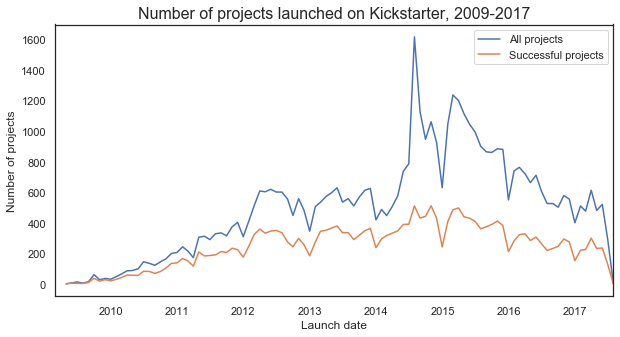

In [662]:
fig, axs = plt.subplots(1, 1, figsize=(10,5))
launched_indexed = pd.DataFrame(ks.set_index('launched_at')['state'].resample('M').count())
success_indexed = pd.DataFrame(ks[ks['state']==1].set_index('launched_at')['state'].resample('M').count())

launched_indexed.tail()
# launched_indexed.plot()
sns.lineplot(data = launched_indexed['state'].rename('no_projects'),   label = 'All projects')
sns.lineplot(data = success_indexed['state'].rename('no_projects'),   label = 'Successful projects')
plt.xlim('2009-03-01', '2017-07-31') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter, 2009-2017', fontsize=16)
plt.show()

There was a spike in 2014

In [634]:
ks[ks['launch_year'] == 2014]['launch_month'].value_counts()

July         1617
August       1127
October      1062
September     947
November      926
June          787
May           738
December      630
April         577
March         508
January       488
February      448
Name: launch_month, dtype: int64

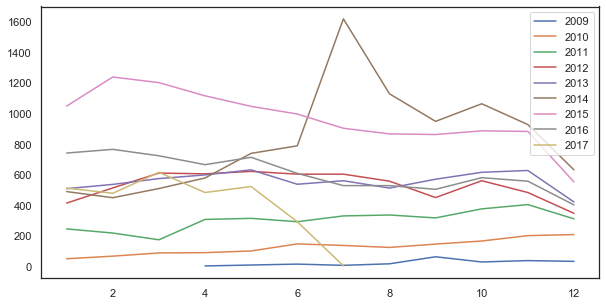

In [678]:
fig, axs = plt.subplots(1, 1, figsize=(10,5))

for year in range(2009,2018):
    year_data = launched_indexed[launched_indexed['year'] ==year]
    sns.lineplot(data = year_data['state'].rename('no_projects'),label =year )

